In [212]:
import os
import glob
import pandas as pd
import pandasql as psql
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

os.chdir("C:/Users/ab/Documents/GitHub/serie_a_analysis/")

def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    return(res)

In [3]:
if (os.path.isfile('data.csv')):
    os.remove('data.csv')
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [4]:
#add a "season" column to distinguish year, and combine all files in the list
combined_csv = pd.concat([pd.read_csv(f).assign(Season=os.path.basename(f).split('.')[0]) for f in all_filenames])
#export to csv
combined_csv.to_csv("data.csv", index=False, mode='w+', encoding='utf-8-sig')

In [5]:
#create a dataframe from the new combined dataset
df = pd.read_csv('data.csv')

In [6]:
pd.set_option('display.max_columns', 500)
df.describe()

,AC,AF,AHCh,AHh,AR,AS,AST,AY,Avg<2.5,Avg>2.5,AvgA,AvgAHA,AvgAHH,AvgC<2.5,AvgC>2.5,AvgCA,AvgCAHA,AvgCAHH,AvgCD,AvgCH,AvgD,AvgH,B365<2.5,B365>2.5,B365A,B365AHA,B365AHH,B365C<2.5,B365C>2.5,B365CA,B365CAHA,B365CAHH,B365CD,B365CH,B365D,B365H,BSA,BSD,BSH,BWA,BWCA,BWCD,BWCH,BWD,BWH,Bb1X2,BbAH,BbAHh,BbAv<2.5,BbAv>2.5,BbAvA,BbAvAHA,BbAvAHH,BbAvD,BbAvH,BbMx<2.5,BbMx>2.5,BbMxA,BbMxAHA,BbMxAHH,BbMxD,BbMxH,BbOU,FTAG,FTHG,GBA,GBD,GBH,HC,HF,HR,HS,HST,HTAG,HTHG,HY,IWA,IWCA,IWCD,IWCH,IWD,IWH,LBA,LBD,LBH,Max<2.5,Max>2.5,MaxA,MaxAHA,MaxAHH,MaxC<2.5,MaxC>2.5,MaxCA,MaxCAHA,MaxCAHH,MaxCD,MaxCH,MaxD,MaxH,P<2.5,P>2.5,PAHA,PAHH,PC<2.5,PC>2.5,PCAHA,PCAHH,PSA,PSCA,PSCD,PSCH,PSD,PSH,SBA,SBD,SBH,SJA,SJD,SJH,Unnamed: 70,Unnamed: 71,Unnamed: 72,VCA,VCCA,VCCD,VCCH,VCD,VCH,WHA,WHCA,WHCD,WHCH,WHD,WHH
count,4008.000000,4008.000000,589.000000,588.000000,4008.000000,4008.000000,4008.000000,4008.000000,588.000000,588.000000,589.000000,588.000000,588.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,586.000000,586.000000,4005.000000,587.000000,587.000000,588.000000,588.000000,589.000000,589.000000,589.000000,589.000000,589.000000,4005.000000,4005.000000,1128.000000,1128.000000,1128.000000,4002.000000,589.000000,589.000000,589.000000,4002.000000,4002.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,4009.000000,4009.000000,1132.000000,1132.000000,1132.000000,4008.000000,4008.000000,4008.000000,4008.000000,4008.000000,4007.000000,4007.000000,4007.000000,3994.000000,589.000000,589.000000,589.000000,3994.000000,3994.000000,3038.000000,3038.000000,3038.000000,588.000000,588.000000,589.000000,588.000000,588.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,587.000000,587.000000,587.000000,587.000000,589.000000,589.000000,589.000000,589.000000,3239.000000,3247.000000,3247.000000,3247.000000,3239.000000,3239.000000,738.000000,738.000000,738.000000,1539.000000,1539.000000,1539.000000,0.0,0.0,0.0,3994.000000,589.000000,589.000000,589.000000,3994.000000,3994.000000,4005.000000,589.000000,589.000000,589.000000,4005.000000,4005.000000
mean,4.683383,14.570609,-0.241935,-0.245323,0.156936,11.285679,4.166168,2.405439,2.212211,1.717126,4.218285,1.930272,1.936667,2.232835,1.717861,4.284380,1.938234,1.934584,4.125857,2.929304,4.094975,2.875042,2.212338,1.717611,4.609728,1.954753,1.959693,2.236769,1.718265,4.256961,1.956010,1.954312,4.156570,2.910832,3.855955,2.695810,4.338200,3.522801,2.432704,4.526702,4.275433,4.119032,2.914958,3.838713,2.673756,41.231871,22.677193,-0.346696,1.925880,1.929026,4.655082,1.943348,1.935137,3.793909,2.656974,2.023135,2.020740,5.345357,2.007974,1.996509,4.062711,2.872544,36.557602,1.204041,1.519332,4.336873,3.521237,2.432889,5.811627,14.291916,0.116766,13.709830,5.127246,0.513851,0.672573,2.156726,4.252078,4.124635,4.058149,2.891681,3.775388,2.586457,4.580155,3.742031,2.580573,2.324269,1.783299,4.679389,1.992959,1.998384,2.391273,1.800238,4.812598,2.018438,2.014211,4.403022,3.190730,4.346401,3.077131,2.287990,1.747223,1.954974,1.967751,2.302071,1.754329,1.960289,1.963039,4.994599,5.091678,4.102097,2.899787,4.092760,2.869916,4.282308,3.450238,2.364588,4.440093,3.564162,2.464113,NaN,NaN,NaN,4.955709,4.439338,4.061766,3.012139,3.888032,2.798843,4.591960,4.422835,4.069915,2.974788,3.742417,2.702052
std,2.683970,4.469569,0.882824,0.857053,0.399740,4.605524,2.411153,1.348835,0.352216,0.209741,3.090546,0.088124,0.109427,0.411728,0.228949,3.238016,0.093483,0.093009,1.039851,1.855028,0.906693,1.746077,0.378115,0.210208,3.433532,0.092676,0.109490,0.441128,0.229803,3.216104,0.099402,0.103227,1.026771,1.863763,1.004502,1.771774,2.518072,0.682172,1.314409,3.342922,3.242412,1.008652,1.828132,1.000684,1.724065,5.805947,4.166385,0.779155,0.323091,0.252645,3.497386,0.217647,0.179040,1.001081,

#plot some histograms to see some initial findings
plt.hist(df.FTHG)

plt.hist(df.FTAG)

plt.hist(df.HST)

plt.hist(df.AST)

plt.hist(df.HC)

plt.hist(df.AC)

df.describe()

df.head()

In [7]:
df.fillna(0, inplace=True)

In [8]:
#create dummies for half-time and full-time scoreline details
cleanup_TR = {"HTR":    {"H": 3, "D": 1, "A": 0},
              "FTR":    {"H": 3, "D": 1, "A": 0}
              }

In [9]:
#load them back into dataframe
df = df.replace(cleanup_TR)

In [10]:
#convert the Home and Away columns into numbers representing the teams indexes
df["HomeTeam"] = df["HomeTeam"].astype('category')
df["Home_Team_Index"] = df["HomeTeam"].cat.codes
df["AwayTeam"] = df["AwayTeam"].astype('category')
df["Away_Team_Index"] = df["AwayTeam"].cat.codes

In [20]:
#get the key for our Home and Away Indexes 
index = psql.sqldf("SELECT DISTINCT Home_Team_Index, HomeTeam FROM df ORDER BY Home_Team_Index")
print(index)

    Home_Team_Index    HomeTeam
0                 0           0
1                 1    Atalanta
2                 2        Bari
3                 3   Benevento
4                 4     Bologna
5                 5     Brescia
6                 6    Cagliari
7                 7       Carpi
8                 8     Catania
9                 9      Cesena
10               10      Chievo
11               11     Crotone
12               12      Empoli
13               13  Fiorentina
14               14   Frosinone
15               15       Genoa
16               16       Inter
17               17    Juventus
18               18       Lazio
19               19       Lecce
20               20     Livorno
21               21       Milan
22               22      Napoli
23               23      Novara
24               24     Palermo
25               25       Parma
26               26     Pescara
27               27        Roma
28               28   Sampdoria
29               29    Sassuolo
30      

In [21]:
df.head()

,AC,AF,AHCh,AHh,AR,AS,AST,AY,Avg<2.5,Avg>2.5,AvgA,AvgAHA,AvgAHH,AvgC<2.5,AvgC>2.5,AvgCA,AvgCAHA,AvgCAHH,AvgCD,AvgCH,AvgD,AvgH,AwayTeam,B365<2.5,B365>2.5,B365A,B365AHA,B365AHH,B365C<2.5,B365C>2.5,B365CA,B365CAHA,B365CAHH,B365CD,B365CH,B365D,B365H,BSA,BSD,BSH,BWA,BWCA,BWCD,BWCH,BWD,BWH,Bb1X2,BbAH,BbAHh,BbAv<2.5,BbAv>2.5,BbAvA,BbAvAHA,BbAvAHH,BbAvD,BbAvH,BbMx<2.5,BbMx>2.5,BbMxA,BbMxAHA,BbMxAHH,BbMxD,BbMxH,BbOU,Date,Div,FTAG,FTHG,FTR,GBA,GBD,GBH,HC,HF,HR,HS,HST,HTAG,HTHG,HTR,HY,HomeTeam,IWA,IWCA,IWCD,IWCH,IWD,IWH,LBA,LBD,LBH,Max<2.5,Max>2.5,MaxA,MaxAHA,MaxAHH,MaxC<2.5,MaxC>2.5,MaxCA,MaxCAHA,MaxCAHH,MaxCD,MaxCH,MaxD,MaxH,P<2.5,P>2.5,PAHA,PAHH,PC<2.5,PC>2.5,PCAHA,PCAHH,PSA,PSCA,PSCD,PSCH,PSD,PSH,SBA,SBD,SBH,SJA,SJD,SJH,Season,Time,Unnamed: 70,Unnamed: 71,Unnamed: 72,VCA,VCCA,VCCD,VCCH,VCD,VCH,WHA,WHCA,WHCD,WHCH,WHD,WHH,Home_Team_Index,Away_Team_Index
0,8.0,17.0,0.0,0.0,0.0,13.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cesena,0.0,0.0,13.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.75,1.29,12.00,5.0,1.25,10.00,0.0,0.0,0.0,4.75,1.30,33.0,14.0,-1.25,2.02,1.76,10.60,2.01,1.86,4.95,1.29,2.10,1.84,13.00,2.05,1.90,5.40,1.35,30.0,28/08/10,I1,0.0,0.0,1,9.00,5.0,1.30,10.0,11.0,0.0,24.0,5.0,0.0,0.0,1,3.0,Roma,10.0,0.0,0.0,0.0,5.0,1.25,11.00,5.0,1.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.00,4.7,1.29,12.0,5.5,1.25,10-11,0,0.0,0.0,0.0,9.00,0.0,0.0,0.0,4.75,1.33,11.0,0.0,0.0,0.0,5.25,1.22,27,9
1,3.0,15.0,0.0,0.0,0.0,9.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Genoa,0.0,0.0,3.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.10,2.40,2.88,3.2,2.38,3.10,0.0,0.0,0.0,3.10,2.30,34.0,23.0,0.00,1.84,1.93,3.01,2.12,1.68,3.12,2.41,1.93,2.02,3.22,2.23,1.75,3.25,2.54,30.0,28/08/10,I1,1.0,0.0,0,3.00,3.1,2.35,9.0,12.0,0.0,14.0,6.0,0.0,0.0,1,2.0,Udinese,2.8,0.0,0.0,0.0,3.1,2.40,2.88,3.0,2.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.90,3.2,2.25,3.0,3.2,2.40,10-11,0,0.0,0.0,0.0,2.88,0.0,0.0,0.0,3.10,2.50,3.0,0.0,0.0,0.0,3.10,2.30,34,15
2,4.0,12.0,0.0,0.0,0.0,18.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Juventus,0.0,0.0,1.91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.25,4.33,2.00,3.2,3.75,1.95,0.0,0.0,0.0,3.30,3.80,35.0,17.0,0.00,1.70,2.10,1.98,1.41,2.72,3.23,3.94,1.75,2.25,2.10,1.50,3.00,3.40,4.46,29.0,29/08/10,I1,0.0,1.0,3,1.95,3.3,3.80,7.0,14.0,0.0,20.0,5.0,0.0,1.0,3,1.0,Bari,2.1,0.0,0.0,0.0,3.2,3.20,1.91,3.1,3.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.95,3.2,3.60,2.0,3.2,4.00,10-11,0,0.0,0.0,0.0,2.00,0.0,0.0,0.0,3.12,3.80,2.0,0.0,0.0,0.0,3.30,3.75,2,17
3,4.0,18.0,0.0,0.0,0.0,11.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Catania,0.0,0.0,3.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.10,2.20,3.40,3.1,2.15,3.70,0.0,0.0,0.0,2.90,2.15,35.0,21.0,0.00,1.65,2.17,3.45,2.40,1.54,3.07,2.20,1.72,2.33,3.75,2.55,1.63,3.30,2.33,25.0,29/08/10,I1,1.0,2.0,3,3.60,3.0,2.15,4.0,18.0,0.0,11.0,7.0,1.0,1.0,1,0.0,Chievo,3.4,0.0,0.0,0.0,3.0,2.10,3.20,3.0,2.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.40,3.0,2.10,3.6,3.0,2.20,10-11,0,0.0,0.0,0.0,3.40,0.0,0.0,0.0,2.88,2.30,3.5,0.0,0.0,0.0,3.15,2.05,10,8
4,6.0,16.0,0.0,0.0,1.0,12.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Napoli,0.0,0.0,3.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.10,2.30,3.00,3.1,2.40,3.10,0.0,0.0,0.0,3.10,2.30,35.0,21.0,0.00,1.75,2.03,3.18,2.23,1.61,3.12,2.30,1.82,2.11,3.57,2.43,1.67,3.30,2.40,29.0,29/08/10,I1,1.0,1.0,1,3.10,3.1,2.30,7.0,18.0,1.0,19.0,8.0,1.0,0.0,0,2.0,Fiorentina,3.1,0.0,0.0,0.0,3.1,2.20,3.00,3.0,2.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.00,3.1,2.25,3.2,3.2,2.30,10-11,0,0.0,0.0,0.0,3.30,0.0,0.0,0.0,3.12,2.20,3.1,0.0,0.0,0.0,3.10,2.20,13,22


In [22]:
#remove all betting columns
df = df[['Season', 'Date', 'HomeTeam', 'Home_Team_Index', 'AwayTeam', 'Away_Team_Index', 'HS', 'AS', 'HST', 'AST', 'HTHG', 'HTAG', 'HTR', 'FTHG', 'FTAG', 'FTR', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR']]

In [23]:
#rename columns
df.columns = ['Season', 'Match_Date', 'Home_Team', 'Home_Team_Index', 'Away_Team', 'Away_Team_Index', 'Home_Team_Shots', 'Away_Team_Shots', 'Home_Team_Shots_on_Target', 'Away_Team_Shots_on_Target', 'Half_Time_Home_Team_Goals', 'Half_Time_Away_Team_Goals', 'Half_Time_Result', 'Full_Time_Home_Team_Goals', 'Full_Time_Away_Team_Goals', 'Full_Time_Result', 'Home_Team_Corners', 'Away_Team_Corners', 'Home_Team_Fouls', 'Away_Team_Fouls', 'Home_Team_Yellow_Cards', 'Away_Team_Yellow_Cards', 'Home_Team_Red_Cards', 'Away_Team_Red_Cards']

In [24]:
df.head()
df.isnull().sum()

Season                       0
Match_Date                   0
Home_Team                    0
Home_Team_Index              0
Away_Team                    0
Away_Team_Index              0
Home_Team_Shots              0
Away_Team_Shots              0
Home_Team_Shots_on_Target    0
Away_Team_Shots_on_Target    0
Half_Time_Home_Team_Goals    0
Half_Time_Away_Team_Goals    0
Half_Time_Result             0
Full_Time_Home_Team_Goals    0
Full_Time_Away_Team_Goals    0
Full_Time_Result             0
Home_Team_Corners            0
Away_Team_Corners            0
Home_Team_Fouls              0
Away_Team_Fouls              0
Home_Team_Yellow_Cards       0
Away_Team_Yellow_Cards       0
Home_Team_Red_Cards          0
Away_Team_Red_Cards          0
dtype: int64

(array([1204.,    0.,    0., 1020.,    0.,    0.,    0.,    0.,    0.,
        1790.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

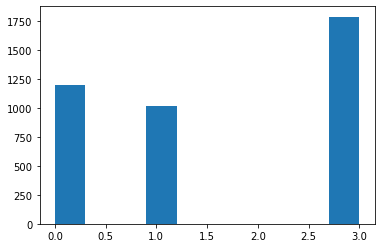

In [25]:
#histogram of the amount of draws vs wins vs losses
plt.hist(df["Full_Time_Result"])

<AxesSubplot:>

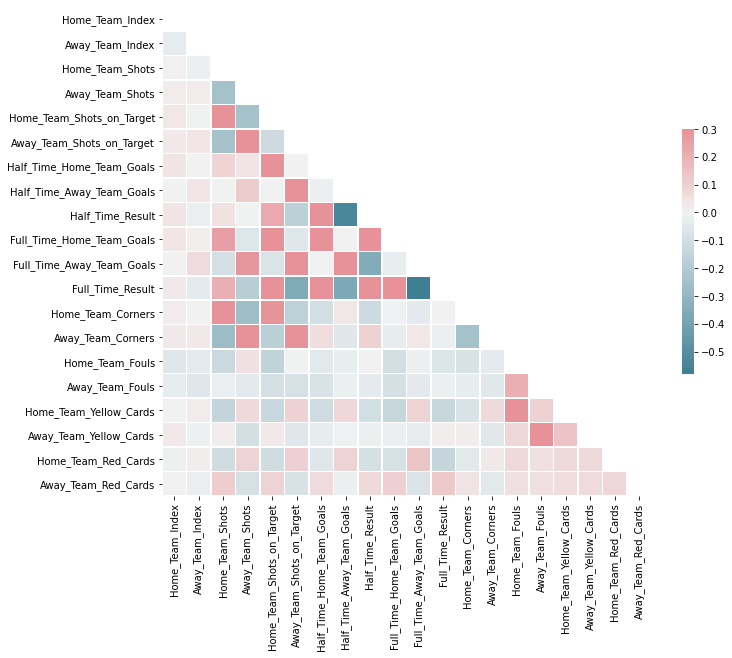

In [26]:
#correlation matrix
corr_matrix = df.corr()

#generate mask for upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#set up matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

#generate diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

#draw heatmap with mask and correct aspect ratio
sn.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})

# MODEL BUILDING

In [202]:
#declare independent and dependent variables, and remove categoric variables
y = df["Full_Time_Result"]
X = df.drop(["Season", "Match_Date", "Home_Team", "Away_Team", "Full_Time_Result"], axis=1)

#declare training splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=9)

#standardize the variables using regularization
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#data/use softmax regression with ridge regression instead of lasso (because dependent variable has 3 possibilities)
softmax_reg = LogisticRegression(random_state=0, multi_class="multinomial", solver="saga", penalty = 'l2', C = 0.01)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=0.01, multi_class='multinomial', random_state=0,
                   solver='saga')

In [193]:
#create a prediction of y values based on model
y_pred = softmax_reg.predict(X_test)

In [194]:
#find model accuracy from test data
acc_score = accuracy_score(y_test, y_pred)
print(acc_score)

0.900373599003736


(array([509.,   0.,   0., 310.,   0.,   0.,   0.,   0.,   0., 787.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

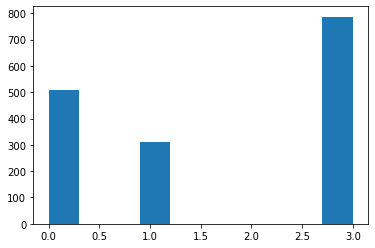

In [195]:
#plot predicted data
plt.hist(y_pred)

In [196]:
#find the worst possible accuracy
baseline_acc = len(y[y == 0]) / len(y) 
print(baseline_acc)

0.2999501743896363


In [197]:
#fidn cohens score; higher score represents less randomness in dataset out of 1
cohens_score = cohen_kappa_score(y_test, y_pred)
print(cohens_score)

0.8436269587707288


In [198]:
print(softmax_reg.coef_)

[[-1.59475990e-02 -1.85139505e-02 -3.79008794e-02 -3.66135478e-03
  -2.15239822e-01  2.16371076e-01 -2.17900765e-01  1.13127435e-01
  -2.30960255e-01 -1.06392697e+00  1.14925637e+00  1.64402249e-02
  -2.46749343e-02 -3.50240837e-02 -4.70066360e-02  3.17213766e-02
  -2.04623784e-02  4.84686132e-02 -6.19668846e-02]
 [-9.27097821e-03  4.28159085e-02  2.14992346e-02  4.77905395e-03
  -5.77307266e-02 -9.21836560e-04  7.89175780e-02  5.29221373e-02
   5.10714757e-03 -2.22296969e-01 -1.08758704e-01  5.28854247e-02
  -3.29730683e-02  4.95241366e-02  5.39814975e-02  1.99848086e-02
   9.65612575e-03  1.75564909e-02 -2.80808216e-03]
 [ 2.52185772e-02 -2.43019579e-02  1.64016448e-02 -1.11769917e-03
   2.72970548e-01 -2.15449240e-01  1.38983187e-01 -1.66049572e-01
   2.25853107e-01  1.28622394e+00 -1.04049766e+00 -6.93256495e-02
   5.76480026e-02 -1.45000529e-02 -6.97486147e-03 -5.17061852e-02
   1.08062526e-02 -6.60251041e-02  6.47749668e-02]]


([<matplotlib.axis.XTick at 0x23ed9996208>,
 [Text(0, 0, 'Home_Team_Index'),
  Text(1, 0, 'Away_Team_Index'),
  Text(2, 0, 'Home_Team_Shots'),
  Text(3, 0, 'Away_Team_Shots'),
  Text(4, 0, 'Home_Team_Shots_on_Target'),
  Text(5, 0, 'Away_Team_Shots_on_Target'),
  Text(6, 0, 'Half_Time_Home_Team_Goals'),
  Text(7, 0, 'Half_Time_Away_Team_Goals'),
  Text(8, 0, 'Half_Time_Result'),
  Text(9, 0, 'Full_Time_Home_Team_Goals'),
  Text(10, 0, 'Full_Time_Away_Team_Goals'),
  Text(11, 0, 'Home_Team_Corners'),
  Text(12, 0, 'Away_Team_Corners'),
  Text(13, 0, 'Home_Team_Fouls'),
  Text(14, 0, 'Away_Team_Fouls'),
  Text(15, 0, 'Home_Team_Yellow_Cards'),
  Text(16, 0, 'Away_Team_Yellow_Cards'),
  Text(17, 0, 'Home_Team_Red_Cards'),
  Text(18, 0, 'Away_Team_Red_Cards')])

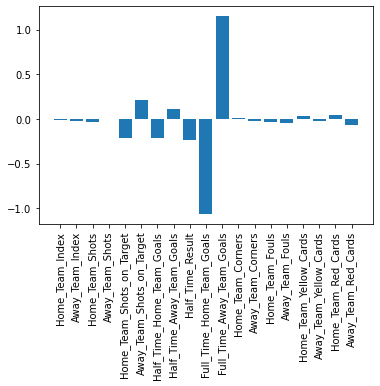

In [199]:
#create a feature importance bar chart using ridge regression
softmax_importance = range(0, softmax_reg.coef_.shape[1])
plt.bar(x = softmax_importance, height = softmax_reg.coef_[0])
plt.xticks(softmax_importance, X.columns, rotation=90)

In [203]:
#use random forest now to do the same thing as logistic regressionl, see if there are any imporvements
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, y_train)
y_pred = rand_forest.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)
baseline_acc = len(y[y == 0]) / len(y) 
cohens_score = cohen_kappa_score(y_test, y_pred)
print(acc_score, baseline_acc, cohens_score)

0.9937733499377335 0.2999501743896363 0.9903602308502625


In [204]:
rand_forest.feature_importances_

array([0.02175994, 0.02259008, 0.02331401, 0.02145939, 0.03597683,
       0.0312945 , 0.04184968, 0.03327809, 0.06057026, 0.33220929,
       0.26983736, 0.01724357, 0.01646418, 0.01870137, 0.01942326,
       0.01302153, 0.01272658, 0.00413831, 0.00414176])

([<matplotlib.axis.XTick at 0x23eda3ba240>,
 [Text(0, 0, 'Home_Team_Index'),
  Text(1, 0, 'Away_Team_Index'),
  Text(2, 0, 'Home_Team_Shots'),
  Text(3, 0, 'Away_Team_Shots'),
  Text(4, 0, 'Home_Team_Shots_on_Target'),
  Text(5, 0, 'Away_Team_Shots_on_Target'),
  Text(6, 0, 'Half_Time_Home_Team_Goals'),
  Text(7, 0, 'Half_Time_Away_Team_Goals'),
  Text(8, 0, 'Half_Time_Result'),
  Text(9, 0, 'Full_Time_Home_Team_Goals'),
  Text(10, 0, 'Full_Time_Away_Team_Goals'),
  Text(11, 0, 'Home_Team_Corners'),
  Text(12, 0, 'Away_Team_Corners'),
  Text(13, 0, 'Home_Team_Fouls'),
  Text(14, 0, 'Away_Team_Fouls'),
  Text(15, 0, 'Home_Team_Yellow_Cards'),
  Text(16, 0, 'Away_Team_Yellow_Cards'),
  Text(17, 0, 'Home_Team_Red_Cards'),
  Text(18, 0, 'Away_Team_Red_Cards')])

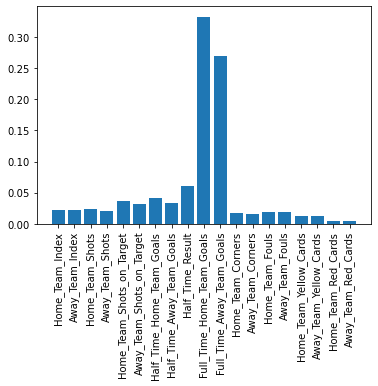

In [206]:
#create a feature importance bar chart
rand_forest_importance = range(0, len(rand_forest.feature_importances_))
plt.bar(x = rand_forest_importance, height = rand_forest.feature_importances_)
plt.xticks(rand_forest_importance, X.columns, rotation=90)

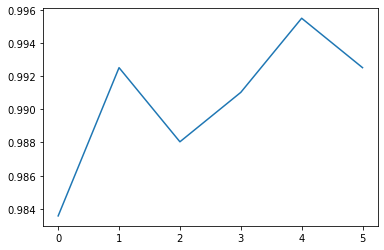

In [214]:
#use K-folds for cross-validation on the random forest model
fold_perf = []

kf = KFold(n_splits=6, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    rand_forest = RandomForestClassifier()
    rand_forest.fit(X_train, y_train)
    y_pred = rand_forest.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)
    fold_perf.append(acc_score)

plt.plot(fold_perf)

In [217]:
#create hyperparameters in order to cross-validate the model 
hyperparam_grid = {'n_estimators': [3, 100, 1000],
                   'max_features': [0.05, 0.5, 0.95],
                   'max_depth': [10, 50, 100, None]}

grid_scorer = make_scorer(cohen_kappa_score)
rand_forest = GridSearchCV(RandomForestClassifier(), hyperparam_grid, cv=kf, scoring=grid_scorer)
rand_forest.fit(X, y)

GridSearchCV(cv=KFold(n_splits=6, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 50, 100, None],
                         'max_features': [0.05, 0.5, 0.95],
                         'n_estimators': [3, 100, 1000]},
             scoring=make_scorer(cohen_kappa_score))

In [219]:
print(rand_forest.best_score_)
print(rand_forest.best_params_)

0.998837107214897
{'max_depth': 10, 'max_features': 0.5, 'n_estimators': 100}
